## 01 -BU

Develop accurate models for predicting future energy prices.
Provide insights to help energy companies and consumers make informed decisions.


## 02 -DU

Loading libary &dataset 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.feature_selection import mutual_info_regression, SelectKBest

In [3]:
data = pd.read_csv('energy_dataset.csv')#Loading the dataset

Explore data

In [4]:
data.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [5]:
# Check for missing values
print(f"Number of missing values: {data.isnull().sum().sum()}")

Number of missing values: 70529


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [7]:
data.describe(). round(3)

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35045.000,35046.000,35046.0,35046.000,35046.000,35045.000,35046.0,35046.0,35046.0,0.0,...,35045.000,35046.0,35046.000,35064.000,0.0,35064.000,35064.000,35028.000,35064.000,35064.000
mean,383.514,448.059,0.0,5622.737,4256.066,298.320,0.0,0.0,0.0,NaN,...,269.452,0.0,5464.480,1439.067,NaN,5471.217,28712.130,28696.940,49.874,57.884
std,85.354,354.569,0.0,2201.830,1961.601,52.521,0.0,0.0,0.0,NaN,...,50.196,0.0,3213.692,1677.703,NaN,3176.313,4594.101,4574.988,14.619,14.204
min,0.000,0.000,0.0,0.000,0.000,0.000,0.0,0.0,0.0,NaN,...,0.000,0.0,0.000,0.000,NaN,237.000,18105.000,18041.000,2.060,9.330
25%,333.000,0.000,0.0,4126.000,2527.000,263.000,0.0,0.0,0.0,NaN,...,240.000,0.0,2933.000,69.000,NaN,2979.000,24793.750,24807.750,41.490,49.348
50%,367.000,509.000,0.0,4969.000,4474.000,300.000,0.0,0.0,0.0,NaN,...,279.000,0.0,4849.000,576.000,NaN,4855.000,28906.000,28901.000,50.520,58.020
75%,433.000,757.000,0.0,6429.000,5838.750,330.000,0.0,0.0,0.0,NaN,...,310.000,0.0,7398.000,2636.000,NaN,7353.000,32263.250,32192.000,60.530,68.010
max,592.000,999.000,0.0,20034.000,8359.000,449.000,0.0,0.0,0.0,NaN,...,357.000,0.0,17436.000,5836.000,NaN,17430.000,41390.000,41015.000,101.990,116.800


In [8]:
# time col it's a string need to drop it at first to check the correlation between other cols
data1 = data.drop(["time"], axis =1)

data1.corr()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
generation biomass,1.000000,0.229809,NaN,-0.021660,0.433522,0.459530,NaN,NaN,NaN,NaN,...,-0.346343,NaN,-0.068658,-0.008713,NaN,-0.072368,0.085216,0.083288,0.108945,0.142369
generation fossil brown coal/lignite,0.229809,1.000000,NaN,0.499808,0.768710,0.314869,NaN,NaN,NaN,NaN,...,0.282810,NaN,-0.434118,0.042306,NaN,-0.436031,0.278503,0.280461,0.567905,0.364088
generation fossil coal-derived gas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation fossil gas,-0.021660,0.499808,NaN,1.000000,0.541635,0.309623,NaN,NaN,NaN,NaN,...,0.275053,NaN,-0.397298,0.080171,NaN,-0.397303,0.543711,0.548913,0.640895,0.461706
generation fossil hard coal,0.433522,0.768710,NaN,0.541635,1.000000,0.440837,NaN,NaN,NaN,NaN,...,0.170235,NaN,-0.441853,0.047356,NaN,-0.444490,0.394291,0.396564,0.671596,0.465641
generation fossil oil,0.459530,0.314869,NaN,0.309623,0.440837,1.000000,NaN,NaN,NaN,NaN,...,-0.175741,NaN,-0.051787,0.096435,NaN,-0.058244,0.498637,0.497089,0.292793,0.284679
generation fossil oil shale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation fossil peat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation geothermal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation hydro pumped storage aggregated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Data visualisations

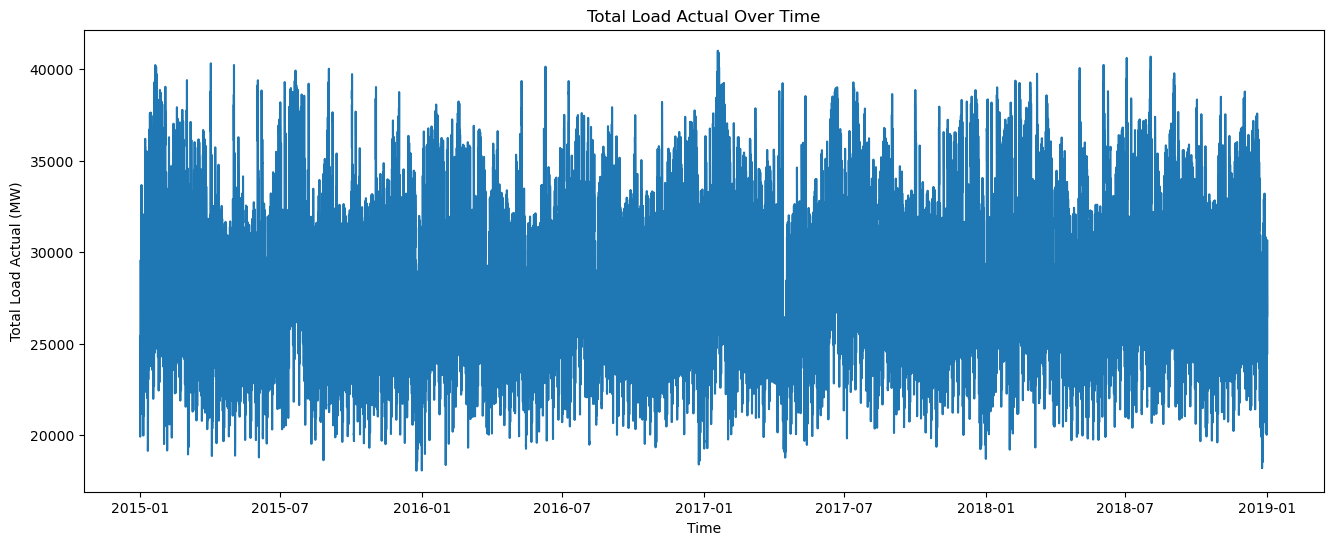

In [9]:
# Visualize the total load actual over time
data['time'] = pd.to_datetime(data['time'])
plt.figure(figsize=(16, 6))
plt.plot(data['time'], data['total load actual'])
plt.xlabel('Time')
plt.ylabel('Total Load Actual (MW)')
plt.title('Total Load Actual Over Time')
plt.show()

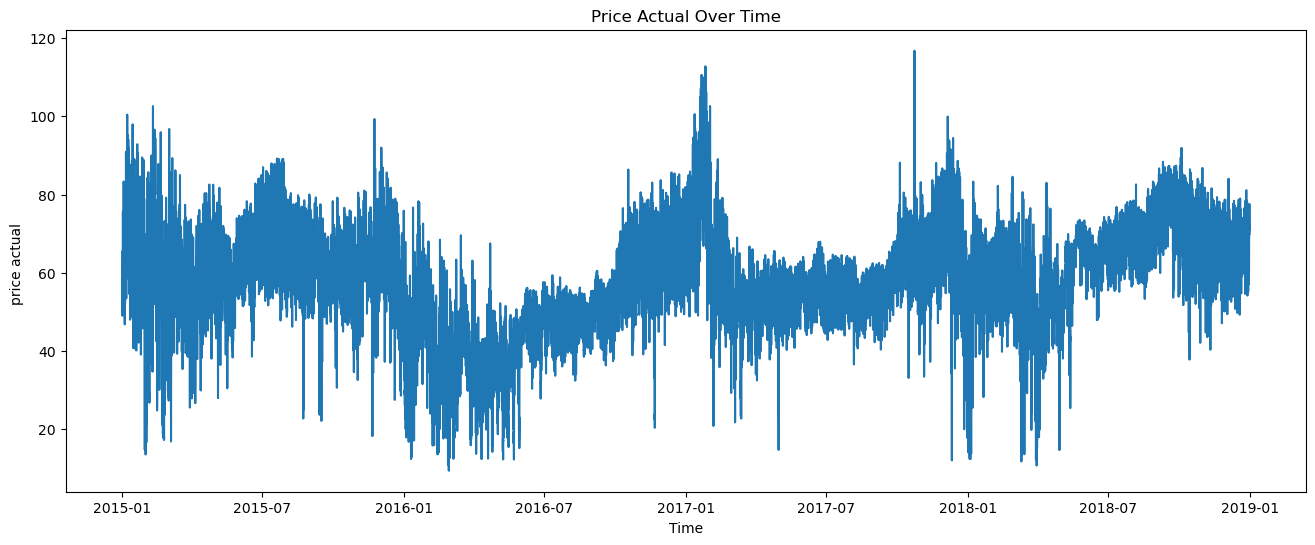

In [10]:
# Visualize the total load actual over time
data['time'] = pd.to_datetime(data['time'],utc=True)
plt.figure(figsize=(16, 6))
plt.plot(data['time'], data['price actual'])
plt.xlabel('Time')
plt.ylabel('price actual ')
plt.title('Price Actual Over Time')
plt.show()

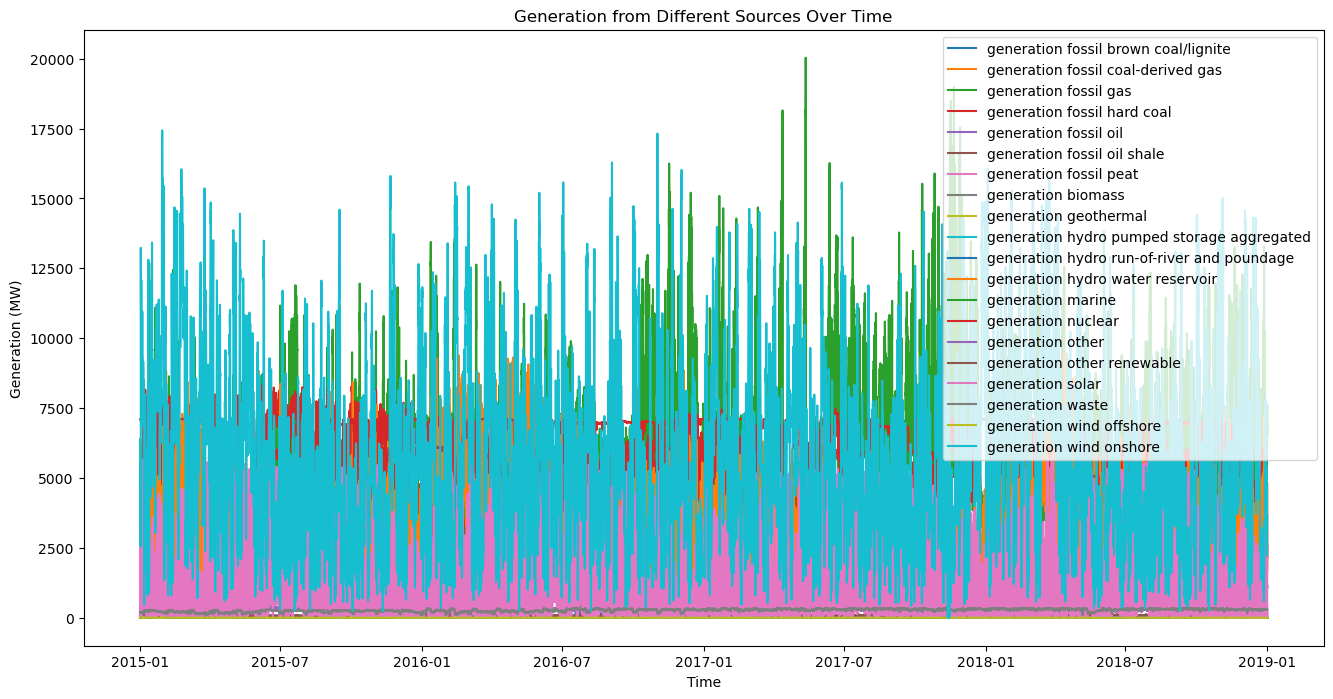

In [11]:
# Visualize the generation from different sources
generation_sources = ['generation fossil brown coal/lignite', 'generation fossil coal-derived gas',
                      'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil',
                      'generation fossil oil shale', 'generation fossil peat', 'generation biomass',
                      'generation geothermal', 'generation hydro pumped storage aggregated',
                      'generation hydro run-of-river and poundage', 'generation hydro water reservoir',
                      'generation marine', 'generation nuclear', 'generation other',
                      'generation other renewable', 'generation solar', 'generation waste',
                      'generation wind offshore', 'generation wind onshore']

plt.figure(figsize=(16, 8))
for source in generation_sources:
    plt.plot(data['time'], data[source], label=source)
plt.xlabel('Time')
plt.ylabel('Generation (MW)')
plt.title('Generation from Different Sources Over Time')
plt.legend()
plt.show()

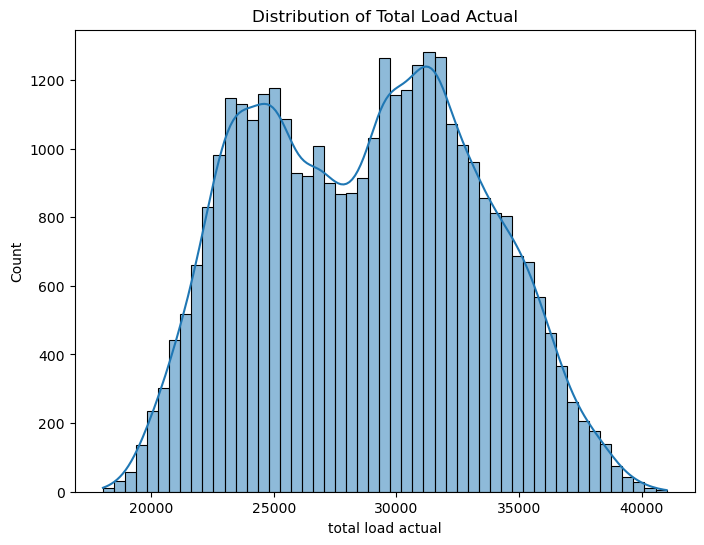

In [12]:
# Visualize the distribution of total load actual
plt.figure(figsize=(8, 6))
sns.histplot(data['total load actual'], kde=True)
plt.title('Distribution of Total Load Actual')
plt.show()

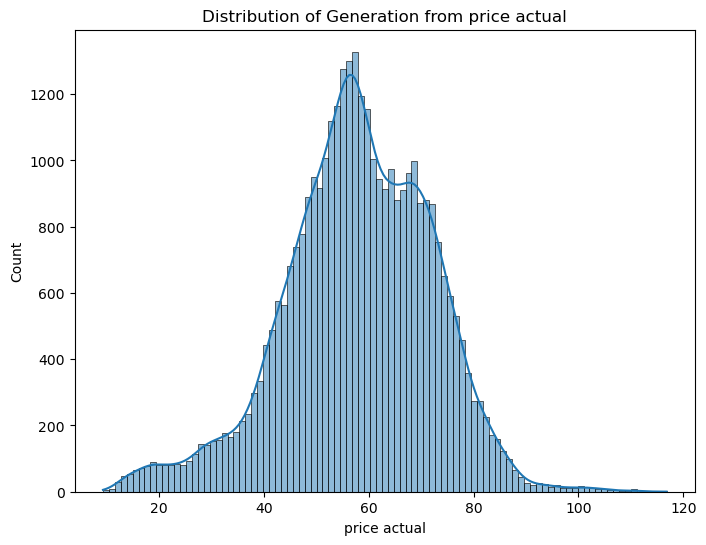

In [13]:
# Visualize the distribution of generation from wind onshore
plt.figure(figsize=(8, 6))
sns.histplot(data['price actual'], kde=True)
plt.title('Distribution of Generation from price actual')
plt.show()

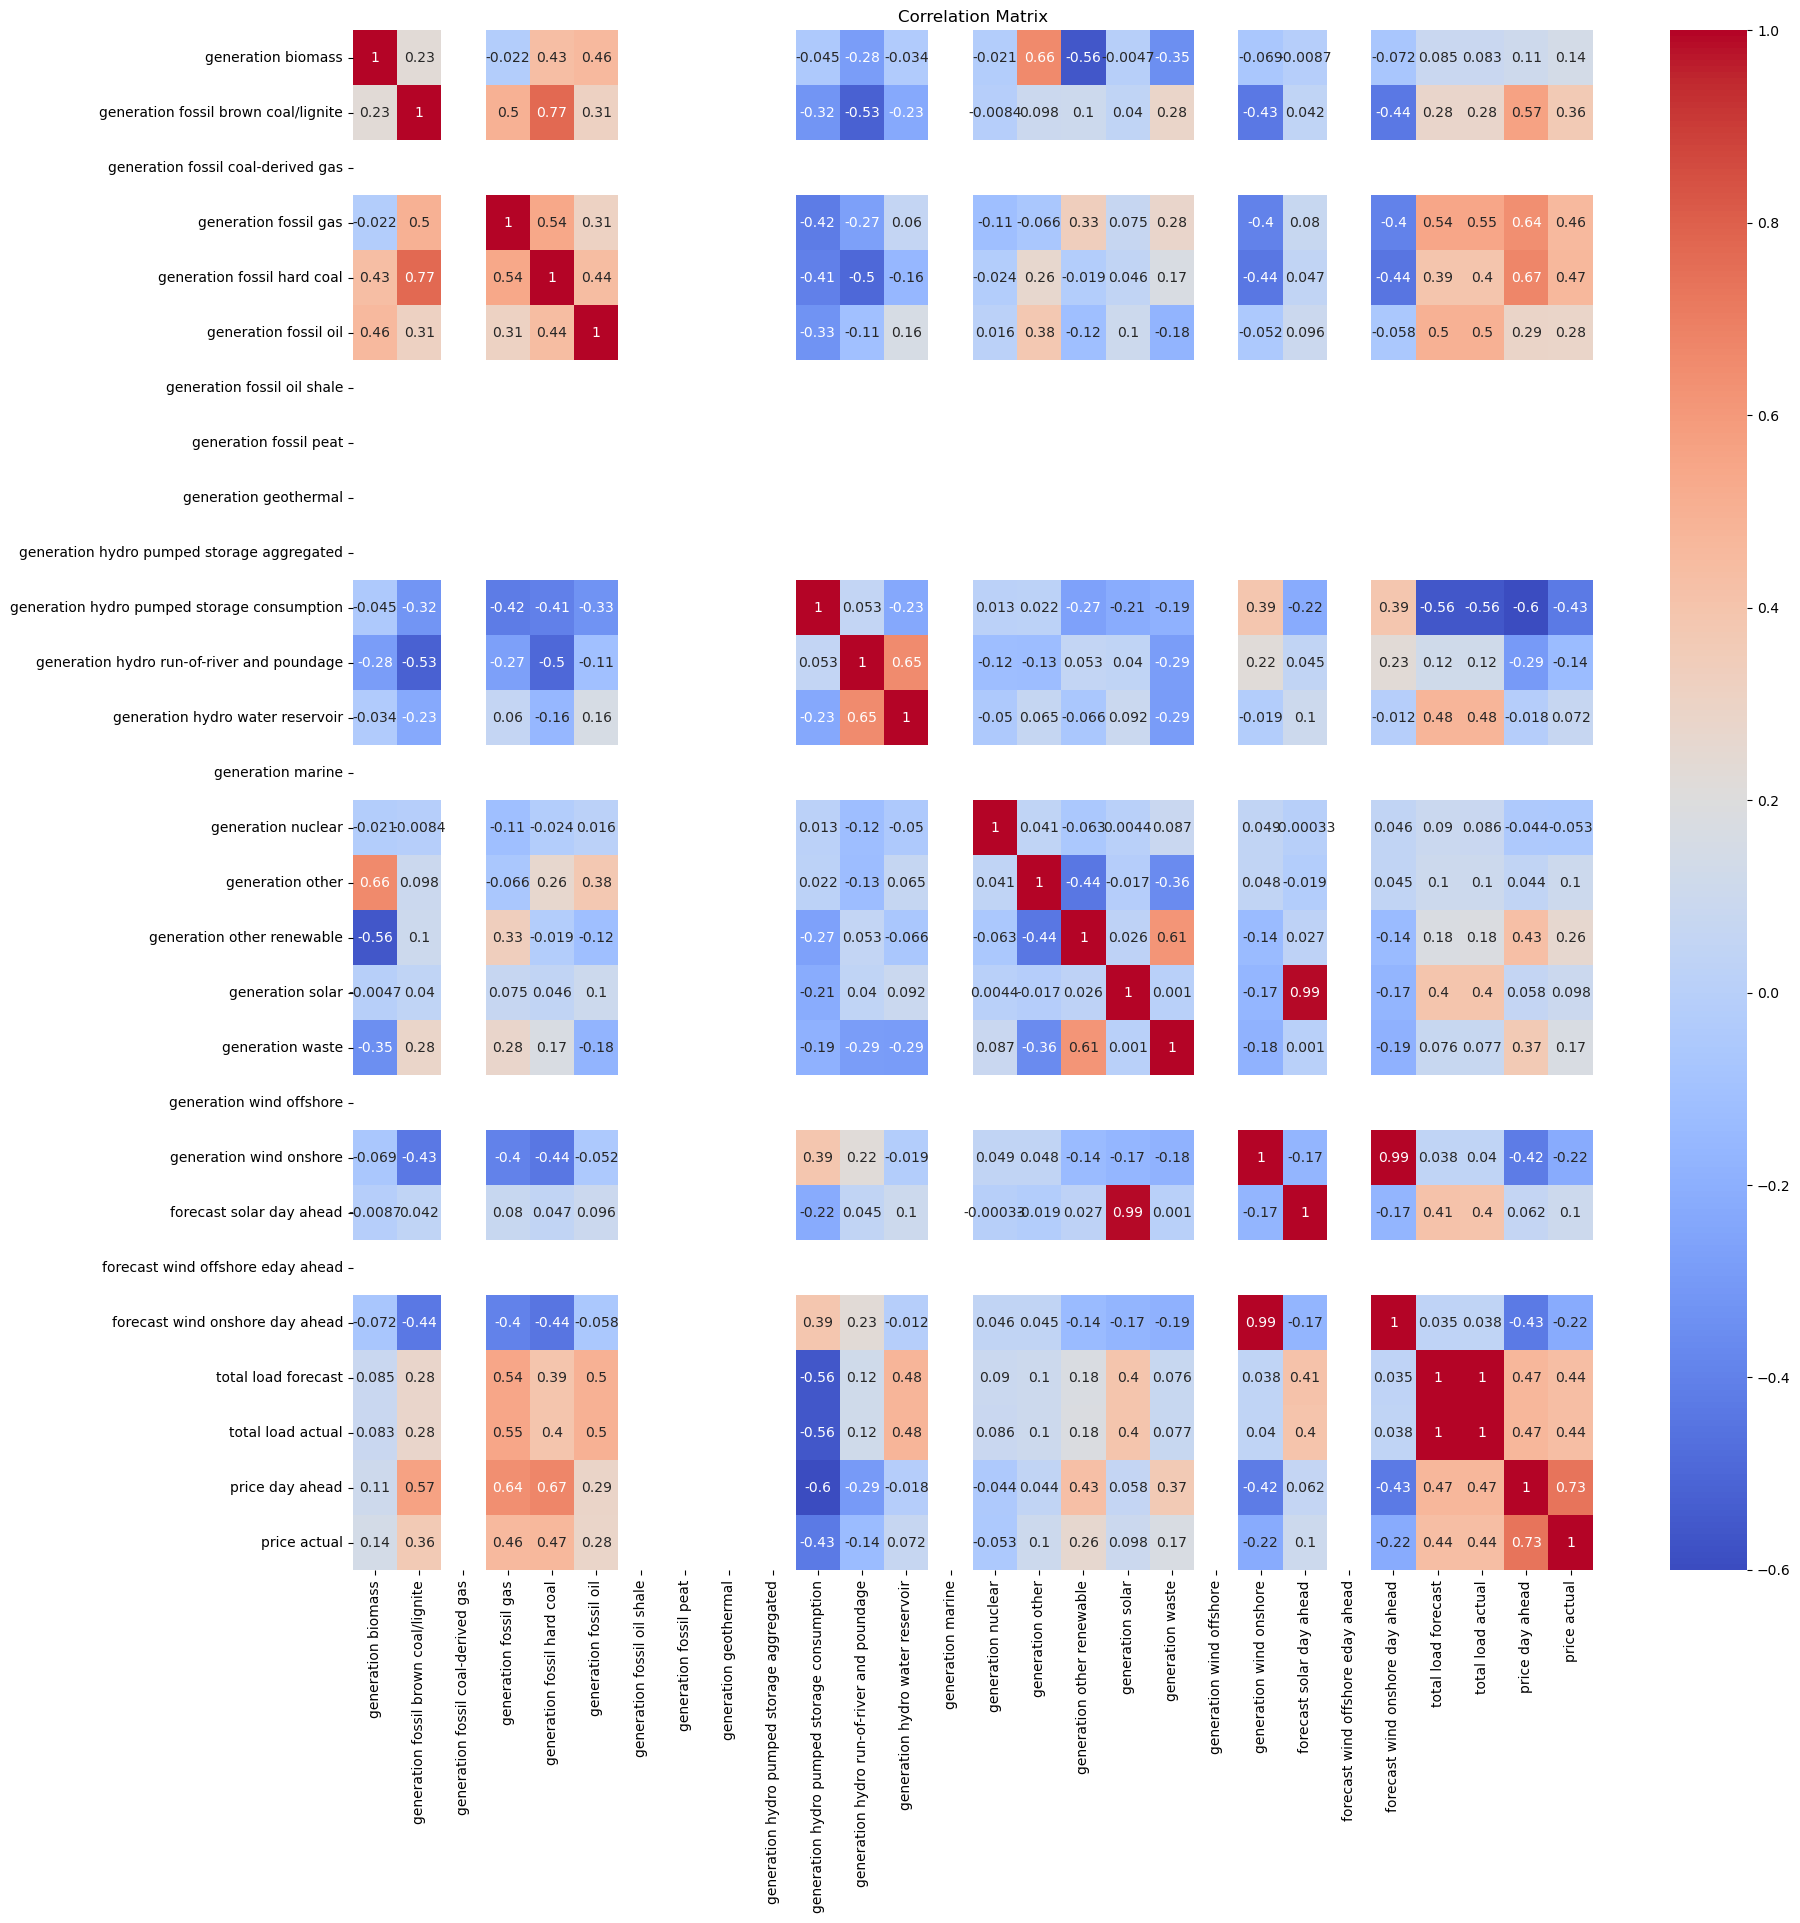

In [14]:
# Compute the correlation matrix
corr_matrix = data1.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

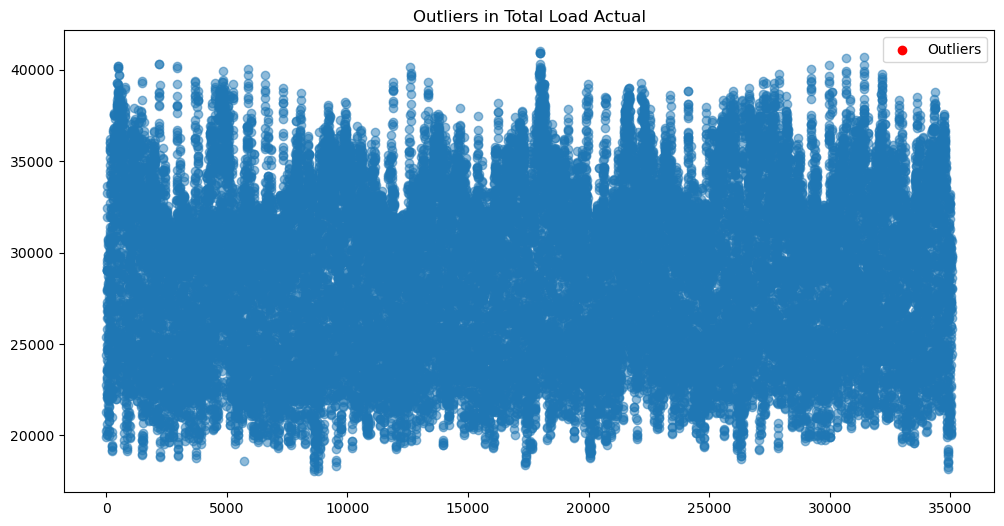

In [15]:
# Identify outliers using z-scores
z_scores = (data['total load actual'] - data['total load actual'].mean()) / data['total load actual'].std()
outliers = data[abs(z_scores) > 3]  # Assuming anything beyond 3 standard deviations is an outlier

# Visualize the outliers
plt.figure(figsize=(12, 6))
plt.scatter(data.index, data['total load actual'], alpha=0.5)
plt.scatter(outliers.index, outliers['total load actual'], color='r', label='Outliers')
plt.legend()
plt.title('Outliers in Total Load Actual')
plt.show()

## 03 -DP

Pre-processing steps

In [16]:
# 3.1Drop full with NaNs in columns(from raw data)

data = data.drop(['generation fossil coal-derived gas','generation fossil oil shale', 
                            'generation fossil peat', 'generation geothermal', 
                            'generation hydro pumped storage aggregated', 'generation marine', 
                            'generation wind offshore', 'forecast wind offshore eday ahead'], 
                            axis=1)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype              
---  ------                                       --------------  -----              
 0   time                                         35064 non-null  datetime64[ns, UTC]
 1   generation biomass                           35045 non-null  float64            
 2   generation fossil brown coal/lignite         35046 non-null  float64            
 3   generation fossil gas                        35046 non-null  float64            
 4   generation fossil hard coal                  35046 non-null  float64            
 5   generation fossil oil                        35045 non-null  float64            
 6   generation hydro pumped storage consumption  35045 non-null  float64            
 7   generation hydro run-of-river and poundage   35045 non-null  float64            
 8   generation hydro water res

In [18]:
# 3.2Find NaNs and duplicates in dataset

print('There are {} missing values or NaNs in dataset.'
      .format(data.isnull().values.sum()))

temp_data = data.duplicated(keep='first').sum()

print('There are {} duplicate rows in dataset based on all columns.'
      .format(temp_data))

There are 292 missing values or NaNs in dataset.
There are 0 duplicate rows in dataset based on all columns.


In [19]:
# 3.2Find the number of NaNs in each column

data.isnull().sum(axis=0)

time                                            0
generation biomass                             19
generation fossil brown coal/lignite           18
generation fossil gas                          18
generation fossil hard coal                    18
generation fossil oil                          19
generation hydro pumped storage consumption    19
generation hydro run-of-river and poundage     19
generation hydro water reservoir               18
generation nuclear                             17
generation other                               18
generation other renewable                     18
generation solar                               18
generation waste                               19
generation wind onshore                        18
forecast solar day ahead                        0
forecast wind onshore day ahead                 0
total load forecast                             0
total load actual                              36
price day ahead                                 0


In [20]:
# 3.2Fill null values using interpolation

data.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)

In [21]:
# 3.2Display the number of non-zero values in each column

print('Non-zero values in each column:\n', data.astype(bool).sum(axis=0), sep='\n')

Non-zero values in each column:

time                                           35064
generation biomass                             35060
generation fossil brown coal/lignite           24540
generation fossil gas                          35063
generation fossil hard coal                    35061
generation fossil oil                          35061
generation hydro pumped storage consumption    22450
generation hydro run-of-river and poundage     35061
generation hydro water reservoir               35061
generation nuclear                             35061
generation other                               35060
generation other renewable                     35061
generation solar                               35061
generation waste                               35061
generation wind onshore                        35061
forecast solar day ahead                       34525
forecast wind onshore day ahead                35064
total load forecast                            35064
total load ac

In [22]:
# 3.5Convert 'time' column to datetime format
data['time'] = pd.to_datetime(data['time'], utc=True)


In [23]:
# 3.3Extract day of the week, month, and year from 'time' column
#data['day_of_week'] = data['time'].dt.day_name()
data['month'] = data['time'].dt.month
data['year'] = data['time'].dt.year

In [24]:
data.info('time')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 23 columns):
 #   Column                                       Non-Null Count  Dtype              
---  ------                                       --------------  -----              
 0   time                                         35064 non-null  datetime64[ns, UTC]
 1   generation biomass                           35064 non-null  float64            
 2   generation fossil brown coal/lignite         35064 non-null  float64            
 3   generation fossil gas                        35064 non-null  float64            
 4   generation fossil hard coal                  35064 non-null  float64            
 5   generation fossil oil                        35064 non-null  float64            
 6   generation hydro pumped storage consumption  35064 non-null  float64            
 7   generation hydro run-of-river and poundage   35064 non-null  float64            
 8   generation hydro water res

In [25]:
# 3.5Convert time to datetime object and set it as index
data = data.set_index('time')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2014-12-31 23:00:00+00:00 to 2018-12-31 22:00:00+00:00
Data columns (total 22 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation biomass                           35064 non-null  float64
 1   generation fossil brown coal/lignite         35064 non-null  float64
 2   generation fossil gas                        35064 non-null  float64
 3   generation fossil hard coal                  35064 non-null  float64
 4   generation fossil oil                        35064 non-null  float64
 5   generation hydro pumped storage consumption  35064 non-null  float64
 6   generation hydro run-of-river and poundage   35064 non-null  float64
 7   generation hydro water reservoir             35064 non-null  float64
 8   generation nuclear                           35064 non-null  float64
 9   generation other         

## 04 -DT

Data transformation steps

In [27]:
# 4.1Separate features and target variable
X = data.drop('price actual', axis=1)
y = data['price actual']

# Feature selection using mutual information
selector = SelectKBest(mutual_info_regression, k='all')
selector.fit(X, y)
selected_features = X.columns[selector.get_support()]
print(f"Selected features: {selected_features}")

# Create a new dataset with selected features
X_selected = selector.transform(X)
X_selected = pd.DataFrame(X_selected, columns=selected_features)

Selected features: Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore',
       'forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead', 'month',
       'year'],
      dtype='object')


In [28]:
# Log transformation
log_transformed_cols = ['total load actual', 'generation biomass', 'generation wind onshore']
print("Log Transformation:")
for col in log_transformed_cols:
    data[f'{col}_log'] = np.log1p(data[col])  # Adding 1 to avoid log(0)
    print(f"{col}:")
    print(data[f'{col}_log'].head())
    print("\n")

Log Transformation:
total load actual:
time
2014-12-31 23:00:00+00:00    10.141953
2015-01-01 00:00:00+00:00    10.101641
2015-01-01 01:00:00+00:00    10.031661
2015-01-01 02:00:00+00:00     9.965852
2015-01-01 03:00:00+00:00     9.916651
Name: total load actual_log, dtype: float64


generation biomass:
time
2014-12-31 23:00:00+00:00    6.104793
2015-01-01 00:00:00+00:00    6.109248
2015-01-01 01:00:00+00:00    6.107023
2015-01-01 02:00:00+00:00    6.084499
2015-01-01 03:00:00+00:00    6.061457
Name: generation biomass_log, dtype: float64


generation wind onshore:
time
2014-12-31 23:00:00+00:00    8.760767
2015-01-01 00:00:00+00:00    8.681181
2015-01-01 01:00:00+00:00    8.605570
2015-01-01 02:00:00+00:00    8.563886
2015-01-01 03:00:00+00:00    8.504311
Name: generation wind onshore_log, dtype: float64




In [29]:
# Box-Cox transformation
boxcox_transformed_cols = ['price day ahead', 'price actual']
print("Box-Cox Transformation:")
for col in boxcox_transformed_cols:
    transformed_col, lmbda = boxcox(data[col] + 1)  # Adding 1 to avoid negative values
    data[f'{col}_boxcox'] = transformed_col
    print(f"{col}:")
    print(data[f'{col}_boxcox'].head())
    print(f"Lambda: {lmbda}")
    print("\n")


Box-Cox Transformation:
price day ahead:
time
2014-12-31 23:00:00+00:00    171.701976
2015-01-01 00:00:00+00:00    162.371146
2015-01-01 01:00:00+00:00    158.818141
2015-01-01 02:00:00+00:00    136.032613
2015-01-01 03:00:00+00:00    119.337018
Name: price day ahead_boxcox, dtype: float64
Lambda: 1.3935064850704468


price actual:
time
2014-12-31 23:00:00+00:00    222.318429
2015-01-01 00:00:00+00:00    220.079123
2015-01-01 01:00:00+00:00    218.073452
2015-01-01 02:00:00+00:00    194.922283
2015-01-01 03:00:00+00:00    180.571356
Name: price actual_boxcox, dtype: float64
Lambda: 1.3624669295413532




In [30]:
# Square root transformation
sqrt_transformed_cols = ['generation fossil gas']
print("Square Root Transformation:")
for col in sqrt_transformed_cols:
    data[f'{col}_sqrt'] = np.sqrt(data[col])
    print(f"{col}:")
    print(data[f'{col}_sqrt'].head())
    print("\n")

Square Root Transformation:
generation fossil gas:
time
2014-12-31 23:00:00+00:00    69.598851
2015-01-01 00:00:00+00:00    72.083285
2015-01-01 01:00:00+00:00    69.692180
2015-01-01 02:00:00+00:00    65.681047
2015-01-01 03:00:00+00:00    64.265076
Name: generation fossil gas_sqrt, dtype: float64




## 05 -DMM

identify the data mining method &describe how it aligns with the objectives

## 06 -DMA

loading relevant algorithms

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

2024-05-03 04:59:56.338084: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 07 -DM

In [32]:
# Preprocess the data
X = data.drop('price actual', axis=1)  # Features
y = data['price actual']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=200,  # Number of decision trees in the ensemble
                                 max_depth=20,  # Maximum depth of each decision tree
                                 min_samples_split=5,  # Minimum number of samples required to split an internal node
                                 min_samples_leaf=2,  # Minimum number of samples required to be at a leaf node
                                 max_features='sqrt')  # Number of features to consider when looking for the best split


In [55]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=200)

In [56]:
# rf make predictions on the test set
y_pred_rf =pd.Series(rf_model.predict(X_test), name ='y_pred_rf')
y_pred_rf

0       64.948093
1       82.154589
2       48.831476
3       81.736603
4       73.295219
          ...    
7008    64.707709
7009    66.606547
7010    62.537987
7011    41.954488
7012    42.335455
Name: y_pred_rf, Length: 7013, dtype: float64

In [36]:
# Convert data to XGBoost format
train_data = xgb.DMatrix(X_train, label=y_train)
test_data = xgb.DMatrix(X_test, label=y_test)

In [37]:
# Set XGBoost parameters
xgb_params = {
    'max_depth': 6,  # Maximum depth of each decision tree
    'learning_rate': 0.1,  # Step size shrinkage used to prevent overfitting
    'subsample': 0.8,  # Fraction of observations to be randomly sampled for each tree
    'colsample_bytree': 0.8,  # Fraction of features to be randomly sampled for each tree
    'gamma': 0,  # Minimum loss reduction required to make a further partition on a leaf node
    'objective': 'reg:squarederror'  # Regression objective
}

In [38]:
# Train the XGBoost Regressor model
xgb_model = xgb.train(xgb_params, train_data, num_boost_round=500, verbose_eval=False)


In [39]:
# xgboost make predictions on the test set
y_pred_xgb = pd.Series(xgb_model.predict(test_data),name ='y_pred_xg')
y_pred_xgb

0       65.561783
1       81.512749
2       49.860348
3       83.678177
4       73.241425
          ...    
7008    64.504532
7009    68.967529
7010    63.070831
7011    41.244938
7012    42.077599
Name: y_pred_xg, Length: 7013, dtype: float32

In [40]:
# LSTM 
# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data for LSTM input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Define the LSTM model architecture
LSTM_model = Sequential()
LSTM_model.add(LSTM(64, input_shape=(1, X_train_reshaped.shape[2]), return_sequences=True))
LSTM_model.add(LSTM(32, return_sequences=False))
LSTM_model.add(Dense(1))

# Compile the model
LSTM_model.compile(optimizer='adam', loss='mean_squared_error')

/Users/arizonaxing/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [43]:
# LSTM model
LSTM_model = LSTM_model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_data=(X_test_reshaped, y_test), verbose=1)


Epoch 1/50
877/877 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0074 - val_loss: 0.0518
Epoch 2/50
877/877 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0139 - val_loss: 0.0025
Epoch 3/50
877/877 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0127 - val_loss: 0.0012
Epoch 4/50
877/877 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0038 - val_loss: 0.0013
Epoch 5/50
877/877 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0108 - val_loss: 0.0046
Epoch 6/50
877/877 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0104 - val_loss: 0.0275
Epoch 7/50
877/877 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0069 - val_loss: 0.0109
Epoch 8/50
877/877 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0190 - val_loss: 0.0010
Epoch 9/50
877/877 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0073 - val_loss: 0.0107
Epoch 10/50
877/877 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0111 - val_loss: 0.0222
Epoch 11/50
877/877 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0070 - val_loss: 0.0352
Epoch 12/50
877/877 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

In [45]:
y_pred_LSTM = LSTM_model.predict(X_test_reshaped)


220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [60]:
# Print out the predicted values
print("Head 5 Predictions:")
for pred in y_pred_LSTM[:5]:
    print(pred)

print("\nTail 5 Predictions:")
for pred in y_pred_LSTM[-5:]:
    print(pred)

Head 5 Predictions:
[65.6552]
[81.84164]
[49.82655]
[83.67748]
[73.10479]

Tail 5 Predictions:
[64.3232]
[68.72525]
[62.96107]
[41.155537]
[41.976437]


In [46]:
# Evaluate the rf model
rf_mae_test = mean_absolute_error(y_test, y_pred_rf)
rf_rmse_test = mean_squared_error(y_test, y_pred_rf, squared=False)
print(f"Random Forest Regression Test:\nMAE: {rf_mae_test:.2f}\nRMSE: {rf_rmse_test:.2f}")

Random Forest Regression Test:
MAE: 0.00
RMSE: 0.01


In [47]:
# Evaluate the xgboost model
xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
xgb_rmse = mean_squared_error(y_test, y_pred_xgb, squared=False)
print(f"\nXGBoost Regression Test:\nMAE: {xgb_mae:.2f}\nRMSE: {xgb_rmse:.2f}")


XGBoost Regression Test:
MAE: 0.16
RMSE: 0.28


In [49]:
# Evaluate the LSTM model
LSTM_train_mse = LSTM_model.evaluate(X_train_reshaped, y_train, verbose=0)
LSTM_test_mse = LSTM_model.evaluate(X_test_reshaped, y_test, verbose=0)

LSTM_train_rmse = np.sqrt(LSTM_train_mse)
LSTM_test_rmse = np.sqrt(LSTM_test_mse)
LSTM_test_mae = mean_absolute_error(y_test, y_pred_LSTM)


print(f"LSTM Test MAE: {LSTM_test_mae:.2f}")
print(f"LSTM Train RMSE: {LSTM_train_rmse:.2f}")
print(f"LSTM Test RMSE: {LSTM_test_rmse:.2f}")

LSTM Test MAE: 0.04
LSTM Train RMSE: 0.05
LSTM Test RMSE: 0.05


execute dm task

## 08 -INT

summarise results & add relevant tables/ graphs

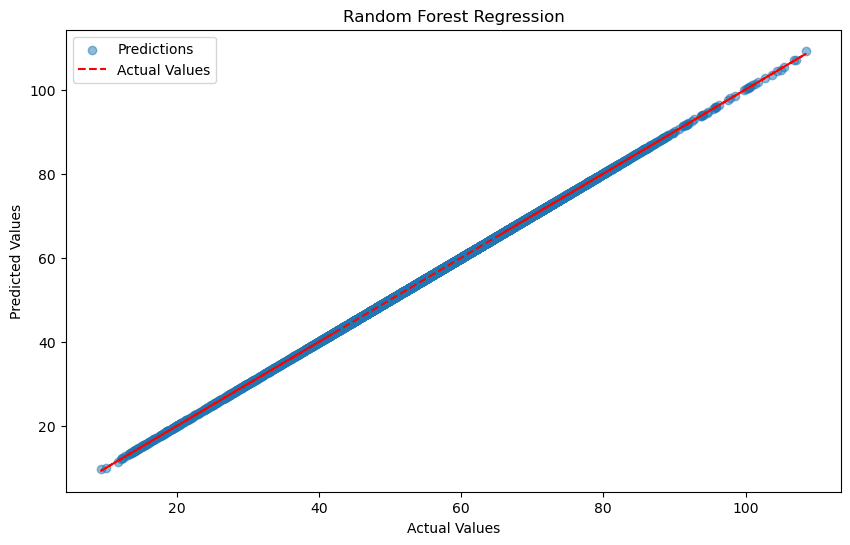

In [50]:
# Random Forest Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Predictions')
plt.plot(y_test, y_test, 'r--', label='Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression')
plt.legend()
plt.show()

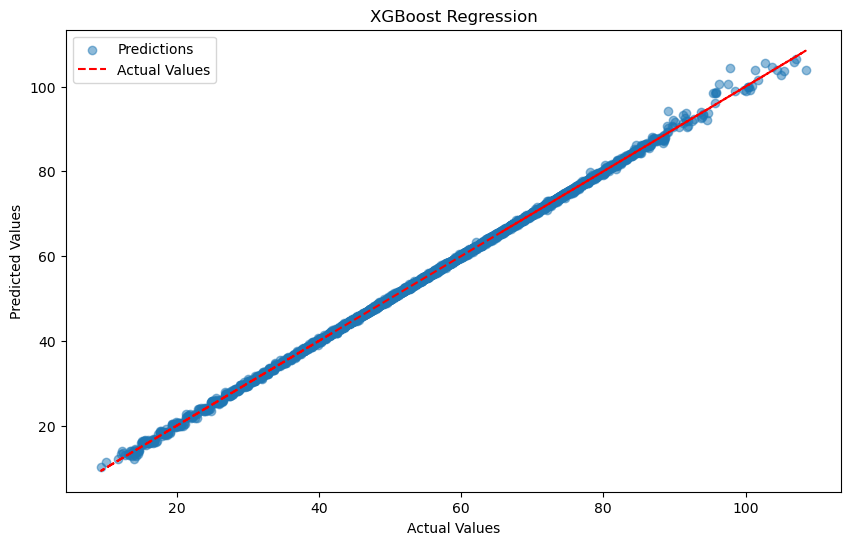

In [51]:
# XGBoost Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5, label='Predictions')
plt.plot(y_test, y_test, 'r--', label='Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('XGBoost Regression')
plt.legend()
plt.show()

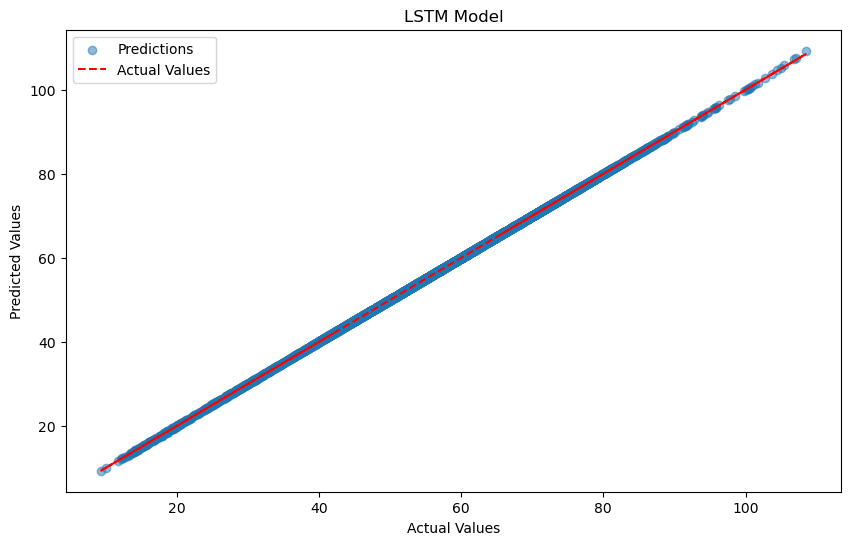

In [52]:
# LSTM predicted values vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_LSTM, alpha=0.5, label='Predictions')
plt.plot(y_test, y_test, 'r--', label='Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('LSTM Model')
plt.legend()
plt.show()

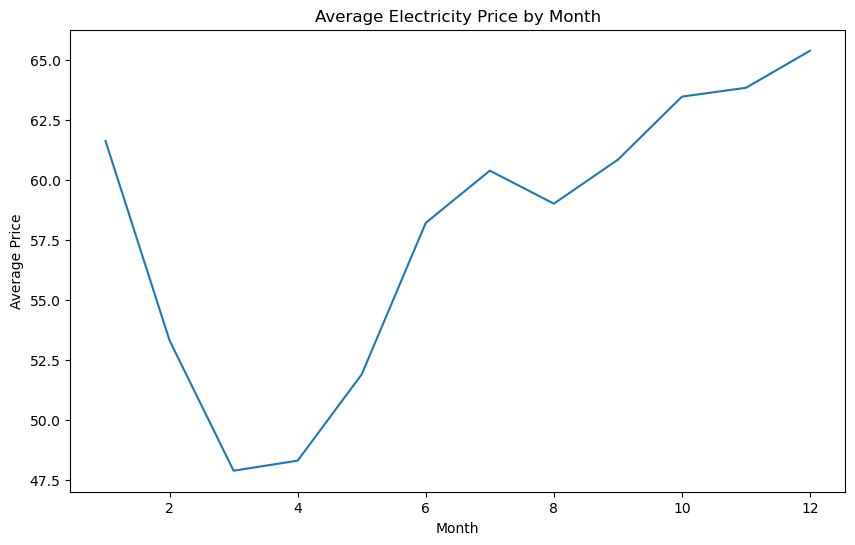

In [62]:
# Group by month and calculate the average price
monthly_prices = data.groupby('month')['price actual'].mean()

# Plot the monthly average prices
plt.figure(figsize=(10, 6))
plt.plot(monthly_prices.index, monthly_prices.values)
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Electricity Price by Month')
plt.show()

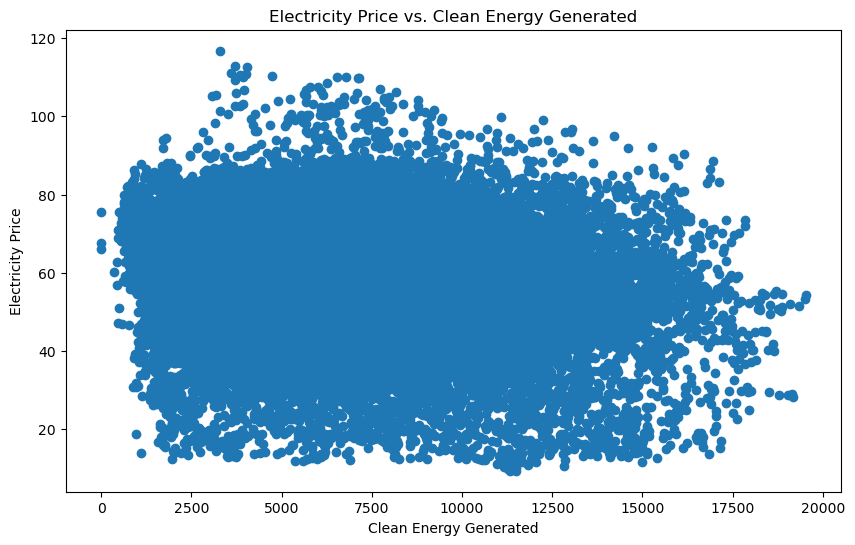

In [65]:
data['clean energy'] = data['generation solar'] + data['generation wind onshore']

# Plot the relationship between clean energy and price
plt.figure(figsize=(10, 6))
plt.scatter(data['clean energy'], data['price actual'])
plt.xlabel('Clean Energy Generated')
plt.ylabel('Electricity Price')
plt.title('Electricity Price vs. Clean Energy Generated')
plt.show()

In [66]:
importances = rf_model.feature_importances_
feature_names = X.columns  # Assuming X is your feature matrix

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

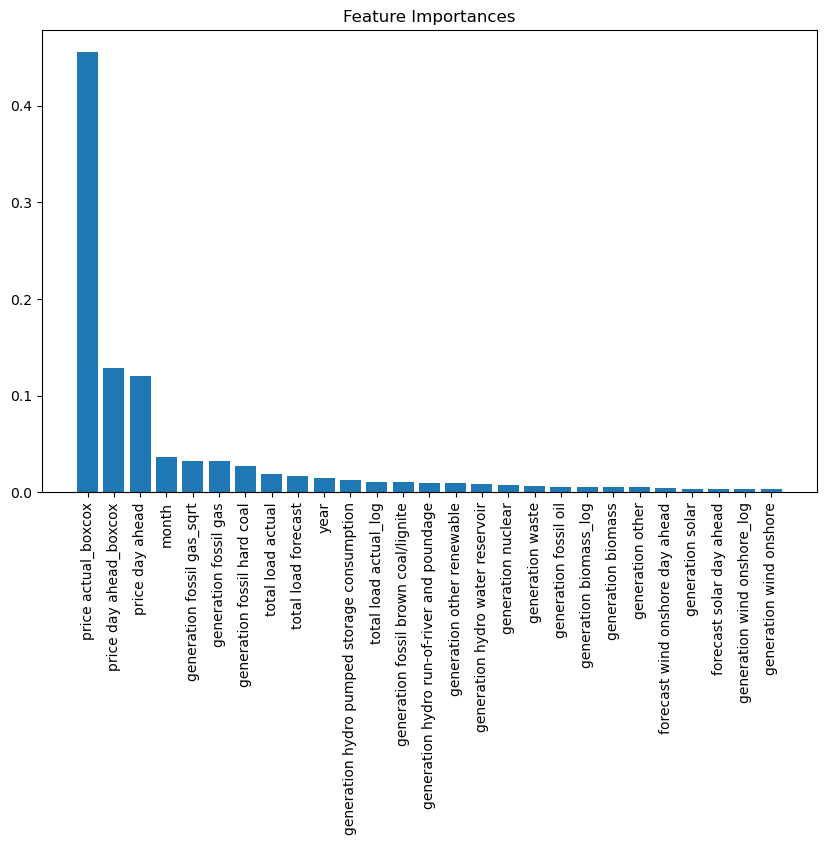

In [67]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.show()

In [77]:
data['month'] = data.index.month
predictions_df = pd.DataFrame({
    'Predicted_Price': y_pred_LSTM.flatten(),
    'Month': X_test.index.month
}, index=X_test.index)
data = data.merge(predictions_df, left_index=True, right_index=True, how='left')

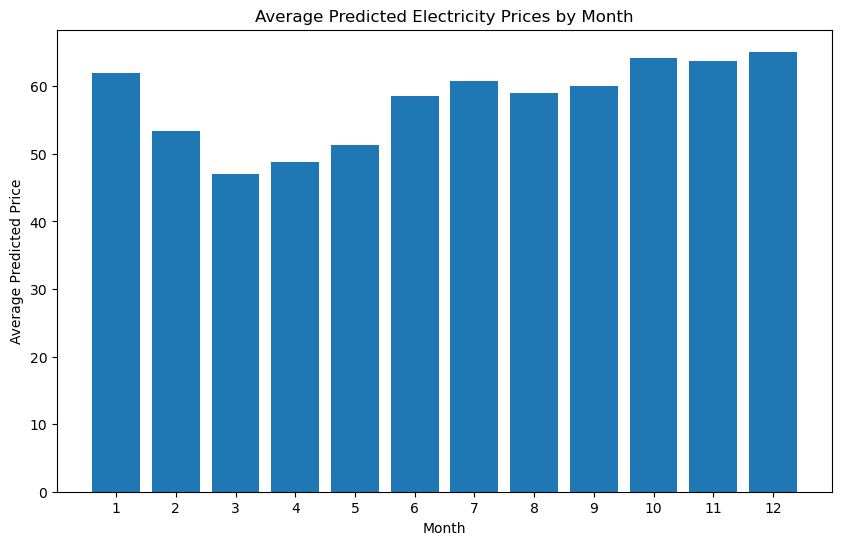

In [78]:
monthly_prices = data.groupby('month')['Predicted_Price'].mean()

# Create a bar plot to visualize the average predicted price for each month
plt.figure(figsize=(10, 6))
plt.bar(monthly_prices.index, monthly_prices.values)
plt.xlabel('Month')
plt.ylabel('Average Predicted Price')
plt.title('Average Predicted Electricity Prices by Month')
plt.xticks(range(1, 13))
plt.show()

In [79]:
# Calculate summary statistics by month
month_stats = data.groupby('month')['Predicted_Price'].agg(['mean', 'median'])
print(month_stats)

            mean     median
month                      
1      61.956795  61.797047
2      53.349499  54.273010
3      47.073818  49.066906
4      48.854084  50.496838
5      51.362686  53.128574
6      58.551033  58.131901
7      60.753067  59.606018
8      58.976460  56.753338
9      60.092079  57.305676
10     64.226189  64.396408
11     63.720943  65.404778
12     65.123772  67.317123


In [82]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5)

In [83]:
# rf make predictions on the test set after adjust
y_pred_rf1 =pd.Series(rf_model.predict(X_test), name ='y_pred_rf1')
y_pred_rf1

0       65.661081
1       81.897664
2       49.838376
3       83.784931
4       73.151206
          ...    
7008    64.376416
7009    68.800144
7010    62.974903
7011    41.118031
7012    42.007360
Name: y_pred_rf1, Length: 7013, dtype: float64

In [84]:
# Evaluate the rf model after adjust
rf_mae_test1 = mean_absolute_error(y_test, y_pred_rf1)
rf_rmse_test1 = mean_squared_error(y_test, y_pred_rf1, squared=False)
print(f"Random Forest Regression Test:\nMAE: {rf_mae_test1:.2f}\nRMSE: {rf_rmse_test1:.2f}")

Random Forest Regression Test:
MAE: 0.01
RMSE: 0.02


In [86]:
rf_mae_before = 0.00
rf_rmse_before = 0.01
rf_mae_after = 0.01
rf_rmse_after = 0.02

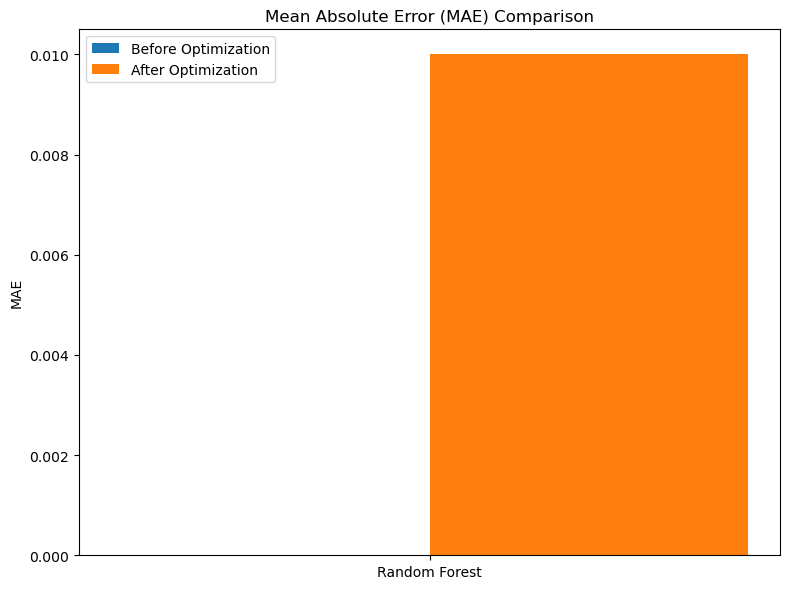

In [90]:
models = ['Random Forest']
mea_before = [rf_mae_before]
mae_after = [rf_mae_after]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(x - width/2, mae_before, width, label='Before Optimization')
ax.bar(x + width/2, mae_after, width, label='After Optimization')

ax.set_title('Mean Absolute Error (MAE) Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylabel('MAE')
ax.legend()

plt.tight_layout()
plt.show()

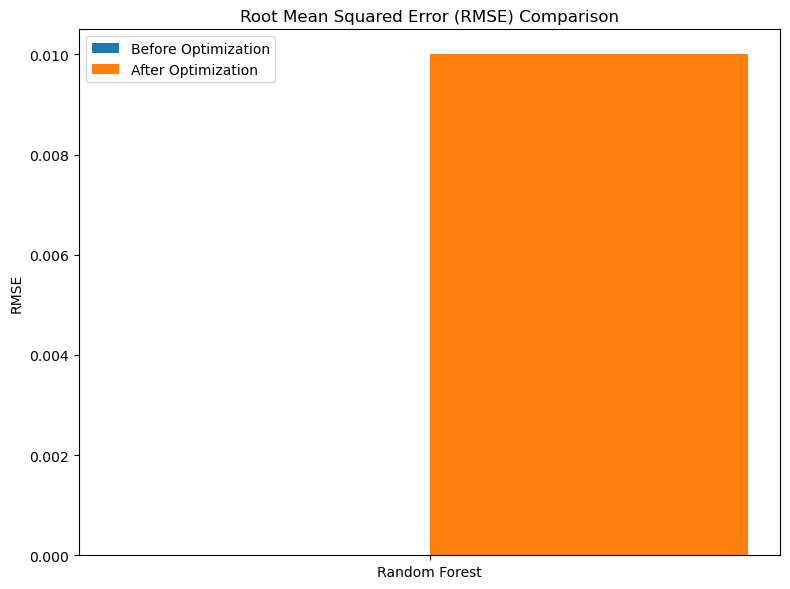

In [91]:
models = ['Random Forest']
rmse_before = [rf_mae_before]
rmse_after = [rf_mae_after]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(x - width/2, rmse_before, width, label='Before Optimization')
ax.bar(x + width/2, rmse_after, width, label='After Optimization')

ax.set_title('Root Mean Squared Error (RMSE) Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylabel('RMSE')
ax.legend()

plt.tight_layout()
plt.show()

## 09- ACT

describe the action plan to implement, observe and improve